In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


exp_path = Path().absolute()
experiment_name = 'simple_16'
filepath = exp_path / 'experiments' / experiment_name /  "results.csv"
df = pd.read_csv(filepath)

df.info()
df.head(10)

/data/projects/distributed-learning-contributivity/experiments/simple_16/results.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
amount_per_node             240 non-null float64
amounts_per_node            240 non-null object
computation_time            240 non-null float64
contributivity_method       240 non-null object
contributivity_score        240 non-null float64
contributivity_scores       240 non-null object
contributivity_std          240 non-null float64
contributivity_stds         240 non-null object
dataset_name                240 non-null object
epoch_count                 240 non-null float64
federated_test_score        240 non-null float64
is_early_stopping           240 non-null float64
node_id                     240 non-null float64
nodes_count                 240 non-null float64
samples_split_option        240 non-null object
scenario_name               240 non-null object
test_data_samples_count     240 n

,amount_per_node,amounts_per_node,computation_time,contributivity_method,contributivity_score,contributivity_scores,contributivity_std,contributivity_stds,dataset_name,epoch_count,...,is_early_stopping,node_id,nodes_count,samples_split_option,scenario_name,test_data_samples_count,testset_option,train_data_samples_count,random_state,scenario_id
0,0.4,"[0.4, 0.3, 0.3]",320.0,Shapley values,0.387333,[0.38733335 0.29748334 0.29558333],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,0.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
1,0.3,"[0.4, 0.3, 0.3]",320.0,Shapley values,0.297483,[0.38733335 0.29748334 0.29558333],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
2,0.3,"[0.4, 0.3, 0.3]",320.0,Shapley values,0.295583,[0.38733335 0.29748334 0.29558333],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,2.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
3,0.4,"[0.4, 0.3, 0.3]",30.0,Independant scores raw,0.982100,[0.98210001 0.9799 0.97750002],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,0.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
4,0.3,"[0.4, 0.3, 0.3]",30.0,Independant scores raw,0.979900,[0.98210001 0.9799 0.97750002],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
5,0.3,"[0.4, 0.3, 0.3]",30.0,Independant scores raw,0.977500,[0.98210001 0.9799 0.97750002],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,2.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
6,0.4,"[0.4, 0.3, 0.3]",30.0,Independant scores additive,0.262160,[0.26215975 0.26158363 0.26095659],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,0.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
7,0.3,"[0.4, 0.3, 0.3]",30.0,Independant scores additive,0.261584,[0.26215975 0.26158363 0.26095659],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
8,0.3,"[0.4, 0.3, 0.3]",30.0,Independant scores additive,0.260957,[0.26215975 0.26158363 0.26095659],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,2.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0,0,0
9,0.9,"[0.9, 0.05, 0.05]",331.0,Shapley values,0.337250,[0.33725 0.22715 0.22420002],0.0,[0. 0. 0.],MNIST,40.0,...,1.0,0.0,3.0,Random,"Random 3 [0.9, 0.05, 0.05]",10000.0,Centralised,48000.0,0,1


In [45]:
df_synthesis = df.groupby(["scenario_id", "random_state", "contributivity_method"], as_index=False).first()
df_synthesis = df_synthesis.drop(["amount_per_node", "contributivity_score", "contributivity_std", "node_id"], axis='columns')
df_synthesis.head(10)

,scenario_id,random_state,contributivity_method,amounts_per_node,computation_time,contributivity_scores,contributivity_stds,dataset_name,epoch_count,federated_test_score,is_early_stopping,nodes_count,samples_split_option,scenario_name,test_data_samples_count,testset_option,train_data_samples_count
0,0,0,Independant scores additive,"[0.4, 0.3, 0.3]",30.0,[0.26215975 0.26158363 0.26095659],[0. 0. 0.],MNIST,40.0,0.7847,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
1,0,0,Independant scores raw,"[0.4, 0.3, 0.3]",30.0,[0.98210001 0.9799 0.97750002],[0. 0. 0.],MNIST,40.0,0.7847,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
2,0,0,Shapley values,"[0.4, 0.3, 0.3]",320.0,[0.38733335 0.29748334 0.29558333],[0. 0. 0.],MNIST,40.0,0.7847,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
3,0,1,Independant scores additive,"[0.4, 0.3, 0.3]",30.0,[0.26958421 0.26996189 0.26985392],[0. 0. 0.],MNIST,40.0,0.8094,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
4,0,1,Independant scores raw,"[0.4, 0.3, 0.3]",30.0,[0.97970003 0.98110002 0.98070002],[0. 0. 0.],MNIST,40.0,0.8094,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
5,0,1,Shapley values,"[0.4, 0.3, 0.3]",159.0,[0.29841665 0.22016666 0.28991667],[0. 0. 0.],MNIST,40.0,0.8094,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
6,0,2,Independant scores additive,"[0.4, 0.3, 0.3]",30.0,[0.26419 0.26321431 0.2642957 ],[0. 0. 0.],MNIST,40.0,0.7917,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
7,0,2,Independant scores raw,"[0.4, 0.3, 0.3]",30.0,[0.98049998 0.97680002 0.98089999],[0. 0. 0.],MNIST,40.0,0.7917,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
8,0,2,Shapley values,"[0.4, 0.3, 0.3]",254.0,[0.33266666 0.27776666 0.27096667],[0. 0. 0.],MNIST,40.0,0.7917,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0
9,0,3,Independant scores additive,"[0.4, 0.3, 0.3]",30.0,[0.28107192 0.2796421 0.280286 ],[0. 0. 0.],MNIST,40.0,0.8410,1.0,3.0,Random,"Random 3 [0.4, 0.3, 0.3]",10000.0,Centralised,48000.0


In [46]:
print('Random state', df.random_state.unique())
print('Scenario id', df.scenario_id.unique())

Random state [0 1 2 3 4 5 6 7 8 9]
Scenario id [0 1 2]


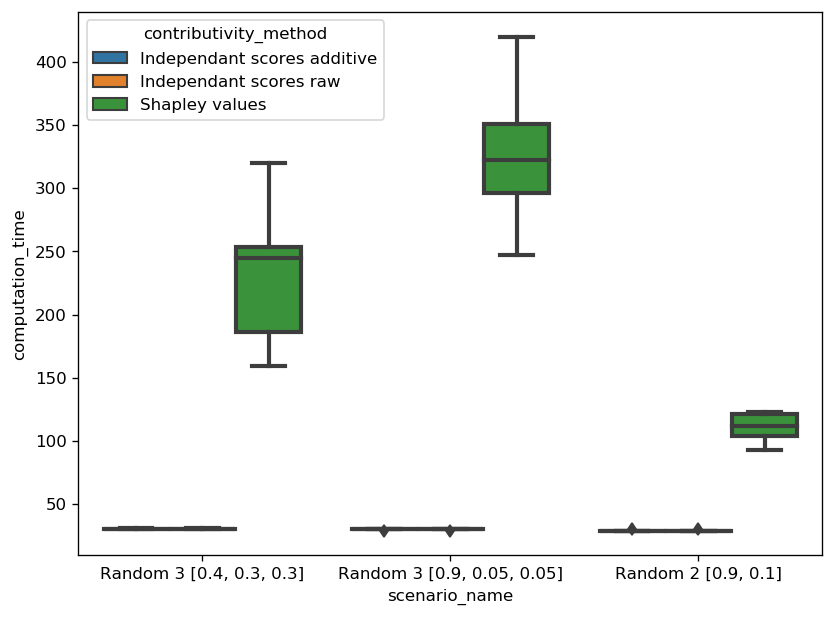

In [51]:
plt.figure(figsize=(8, 6), dpi=120)
ax = sns.boxplot(x="scenario_name", y="computation_time", hue="contributivity_method",
                 data=df_synthesis, linewidth=2.5)

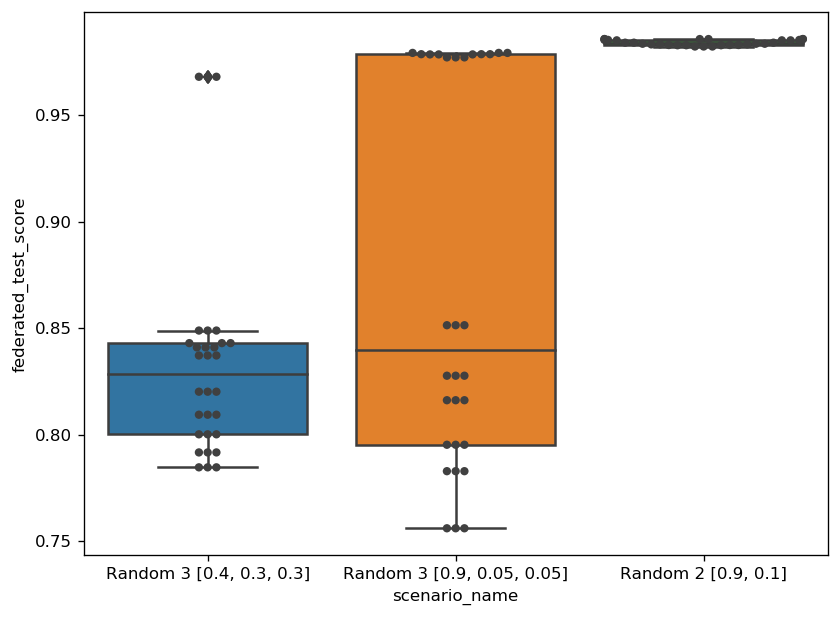

In [53]:
plt.figure(figsize=(8, 6), dpi=120)
ax = sns.boxplot(x="scenario_name", y="federated_test_score",
                 data=df_synthesis)
ax = sns.swarmplot(x="scenario_name", y="federated_test_score",
                 data=df_synthesis,  color=".25")

In [49]:
def get_x_tick_amount(df, scenario_id, node_ids):
    
    x_ticks = []
    for node_id in node_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.node_id == node_id)]
        amount = current_df.amount_per_node.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('node_' + str(node_id) + ' ' + str(amount))
    return x_ticks

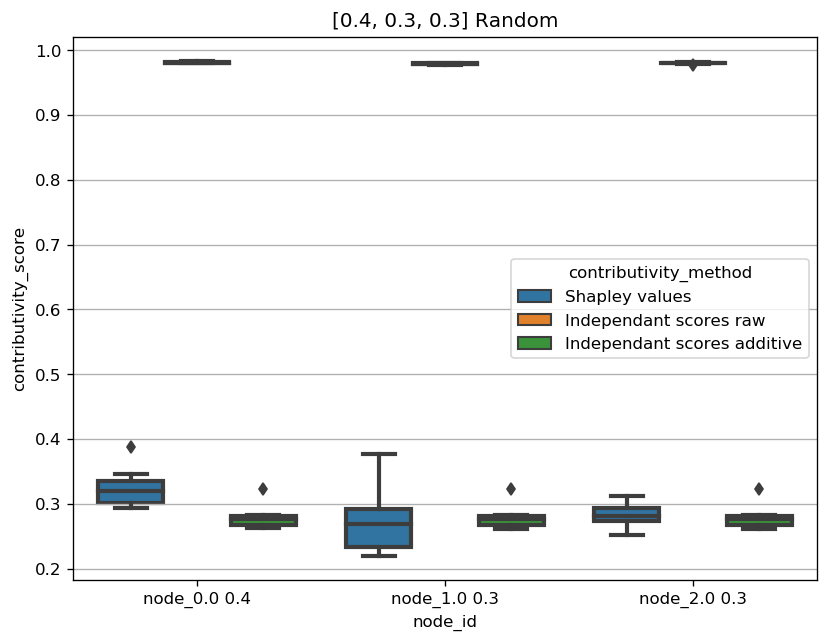

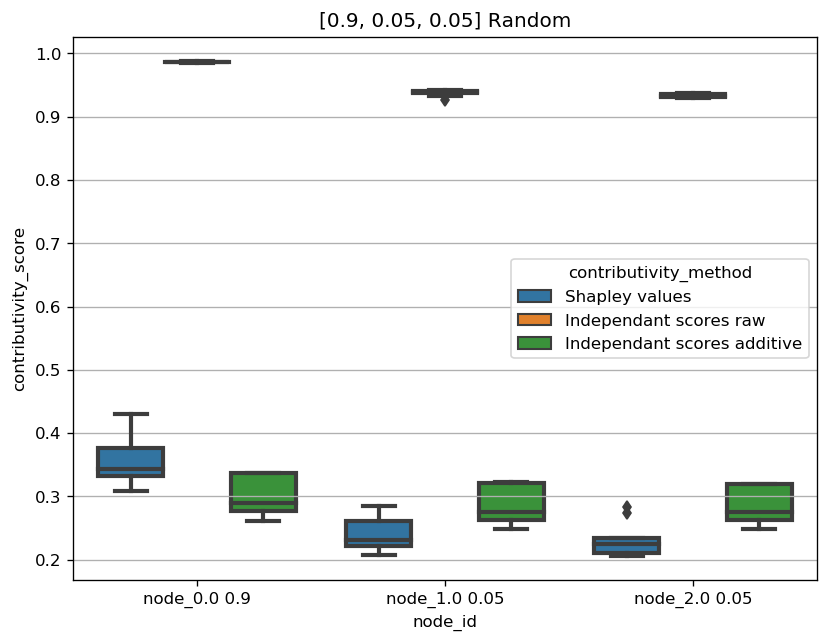

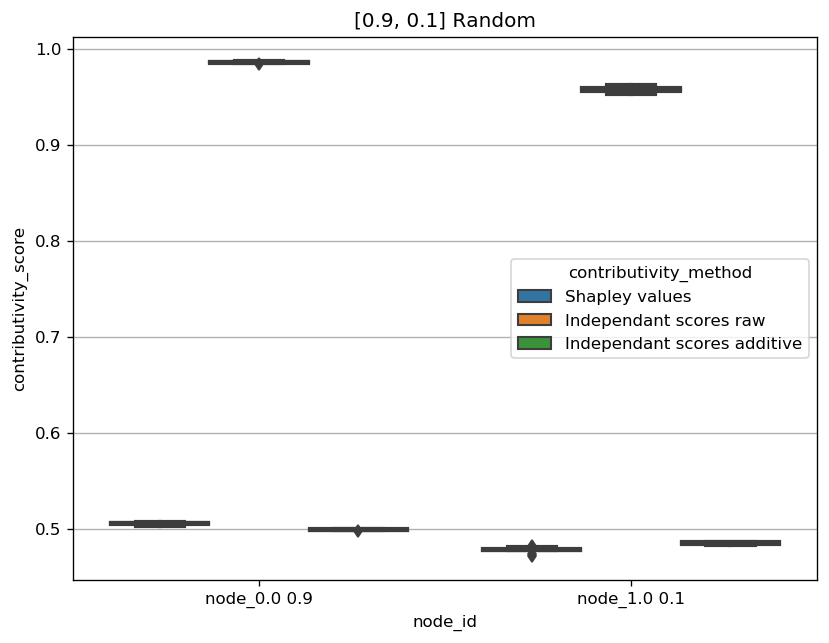

In [50]:
for scenario_id in df.scenario_id.unique():

    current_df = df[df.scenario_id == scenario_id]
    plt.figure(figsize=(8, 6), dpi=120)
    title = current_df.amounts_per_node.iloc[0] + ' ' + current_df.samples_split_option.iloc[0]

    plt.title(title)
    plt.grid(True)
    
    ax = sns.boxplot(x="node_id", y="contributivity_score", hue="contributivity_method",
               data=current_df, linewidth=2.5)
    plt.xticks(current_df.node_id.unique(), get_x_tick_amount(current_df, scenario_id, current_df.node_id.unique()))
    